#UTS

##Tugas

Lakukan analisa terhadap data pada dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)

##Metode KNN

In [1]:
import pandas as pd
link = "https://raw.githubusercontent.com/njungger/dataset/main/dataR2.csv"
df = pd.read_csv(link)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
df

In [ ]:
X = pd.DataFrame(df.data, columns=df.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(df.target, df.target_names)
y = pd.get_dummies(y, drop_first=True)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns
sns.set()

In [9]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [16]:
y_pred = knn.predict(X_test)

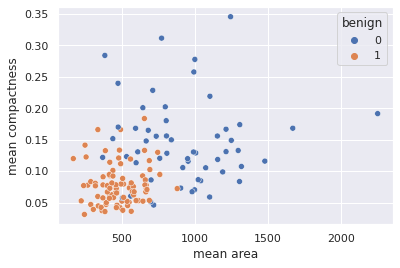

In [19]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

##Metode decision tree

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [21]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [31]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [32]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

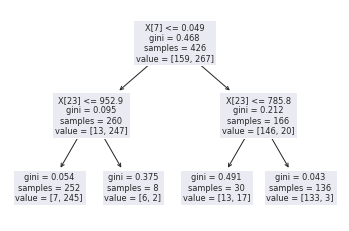

In [33]:
tree.plot_tree(clf);